In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openslide

In [62]:
train_df = pd.read_csv("../input/mayo-clinic-strip-ai/train.csv")
test_df = pd.read_csv("../input/mayo-clinic-strip-ai/test.csv")
other_df = pd.read_csv("../input/mayo-clinic-strip-ai/other.csv")

In [63]:
train_df.shape

(754, 5)

In [64]:
test_df.shape

(4, 4)

In [65]:
train_df.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    754 non-null    object
 1   center_id   754 non-null    int64 
 2   patient_id  754 non-null    object
 3   image_num   754 non-null    int64 
 4   label       754 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.6+ KB


In [67]:
print('Train_df')
print(train_df)
print('\n')
print('Test_df')
print(test_df)
print('\n')
print('Other_df')
print(other_df)
print('\n')
train_df.info()

Train_df
     image_id  center_id patient_id  image_num label
0    006388_0         11     006388          0    CE
1    008e5c_0         11     008e5c          0    CE
2    00c058_0         11     00c058          0   LAA
3    01adc5_0         11     01adc5          0   LAA
4    026c97_0          4     026c97          0    CE
..        ...        ...        ...        ...   ...
749  fe9645_0          3     fe9645          0    CE
750  fe9bec_0          4     fe9bec          0   LAA
751  ff14e0_0          6     ff14e0          0    CE
752  ffec5c_0          7     ffec5c          0   LAA
753  ffec5c_1          7     ffec5c          1   LAA

[754 rows x 5 columns]


Test_df
   image_id  center_id patient_id  image_num
0  006388_0         11     006388          0
1  008e5c_0         11     008e5c          0
2  00c058_0         11     00c058          0
3  01adc5_0         11     01adc5          0


Other_df
     image_id patient_id  image_num  other_specified    label
0    01f2b3_0     01f2b

In [68]:
train_df['image_path'] = train_df['image_id'].apply(lambda x: "../input/mayo-clinic-strip-ai/train/" + x + ".tif")
train_df.head(3)

,image_id,center_id,patient_id,image_num,label,image_path
0,006388_0,11,006388,0,CE,../input/mayo-clinic-strip-ai/train/006388_0.tif
1,008e5c_0,11,008e5c,0,CE,../input/mayo-clinic-strip-ai/train/008e5c_0.tif
2,00c058_0,11,00c058,0,LAA,../input/mayo-clinic-strip-ai/train/00c058_0.tif


In [69]:
train_df.isnull().sum() 

image_id      0
center_id     0
patient_id    0
image_num     0
label         0
image_path    0
dtype: int64

In [70]:
train_df['image_id'].nunique() #checking for no of unique

754

In [71]:
train_df['image_id'].value_counts().sum()

754

In [72]:
# Crear una tabla de contingencia entre "center_id" y "label"
crosstab = pd.crosstab(train_df['center_id'],train_df['label'])
print(crosstab)

label       CE  LAA
center_id          
1           44   10
2           26    3
3           22   27
4           88   26
5           29    9
6           24   14
7           70   29
8           14    2
9           14    2
10          37    7
11         179   78


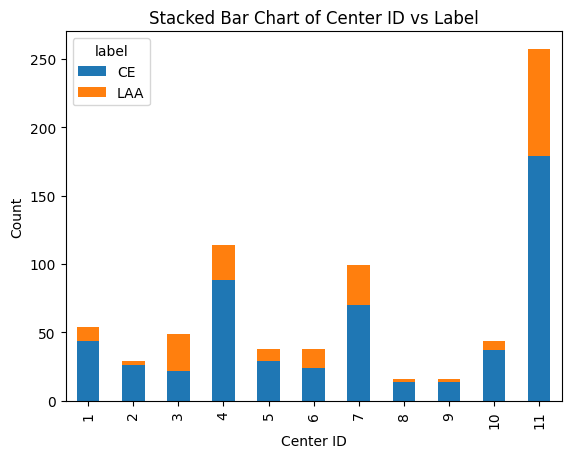

In [73]:
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Center ID vs Label')
plt.show()

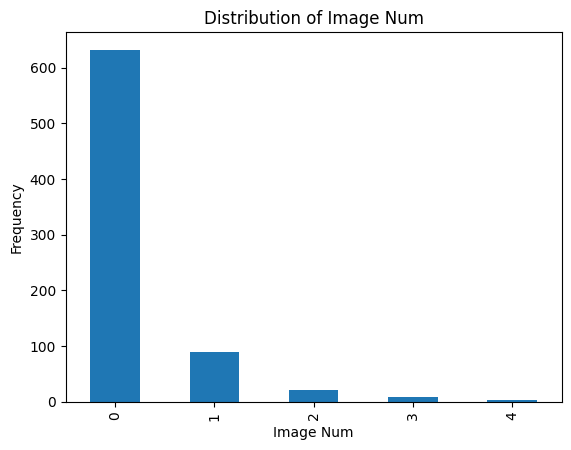

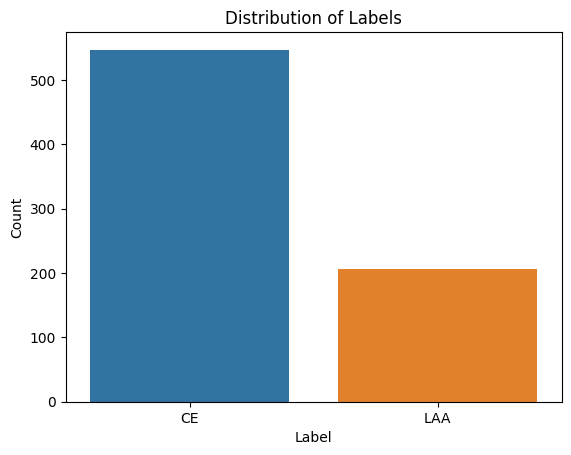

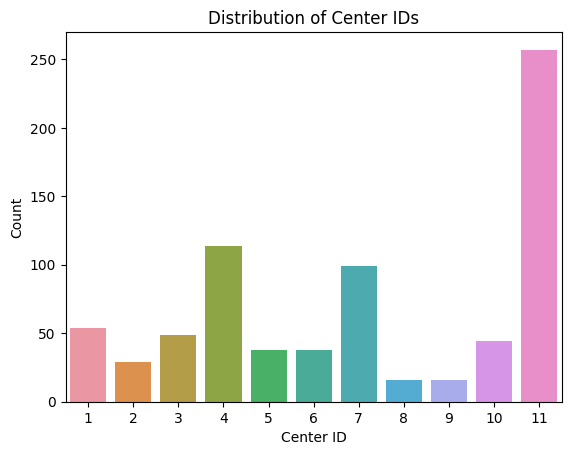

In [74]:
train_df['image_num'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Image Num')
plt.ylabel('Frequency')
plt.title('Distribution of Image Num')
plt.show()

# Gráfico de barras para visualizar la distribución de "label"
sns.countplot(x='label', data=train_df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

# Gráfico de barras para visualizar la distribución de "center_id"
sns.countplot(x='center_id', data=train_df)
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Distribution of Center IDs')
plt.show()

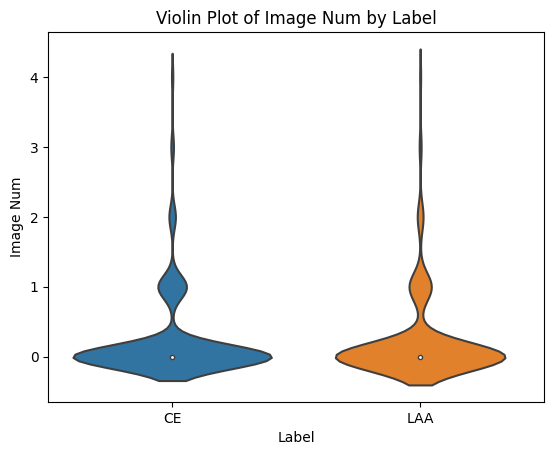

In [75]:
sns.violinplot(x='label', y='image_num', data=train_df)
plt.xlabel('Label')
plt.ylabel('Image Num')
plt.title('Violin Plot of Image Num by Label')
plt.show()

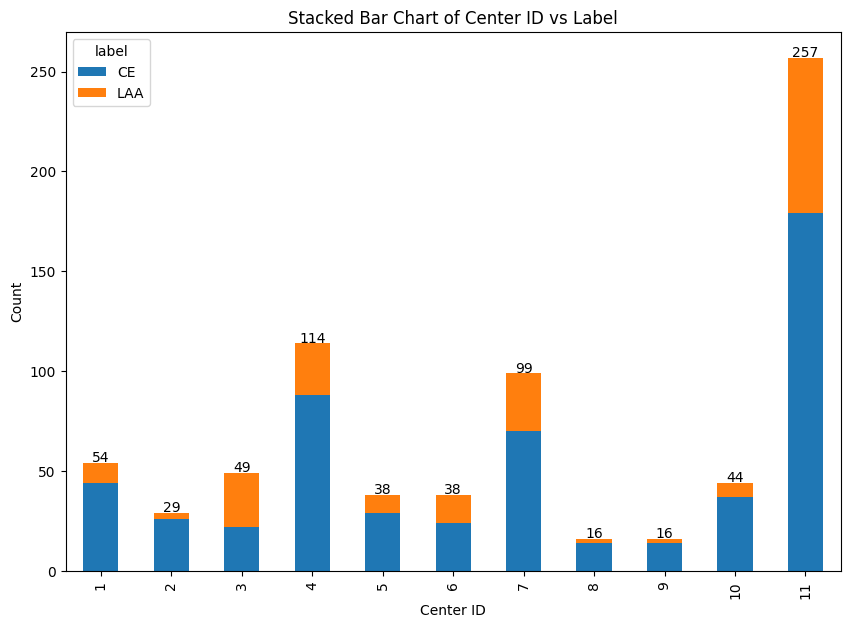

In [40]:
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,7))
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Center ID vs Label')

# Añadir anotaciones de texto con el conteo total por center_id
for idx, label in enumerate(list(crosstab.index)):
    total = crosstab.loc[label].sum()
    plt.annotate(str(total), (idx, total + 0.5), ha='center')

plt.show()

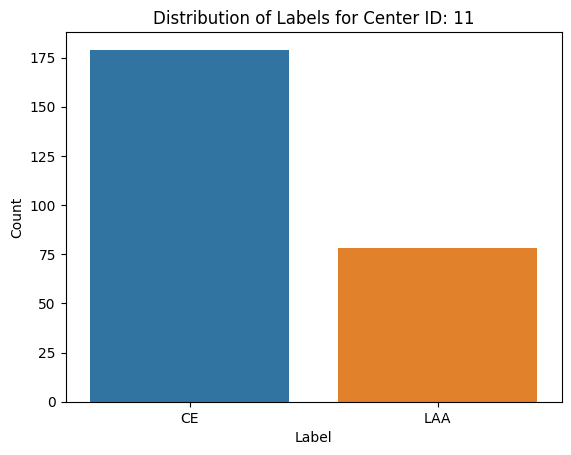

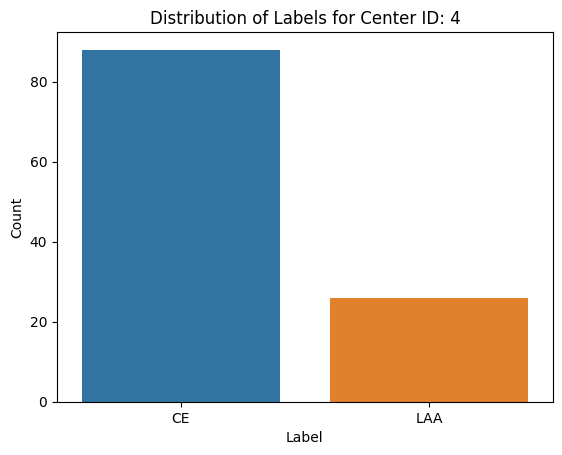

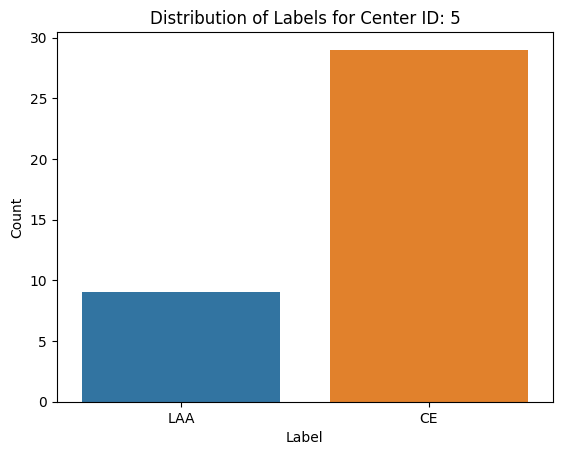

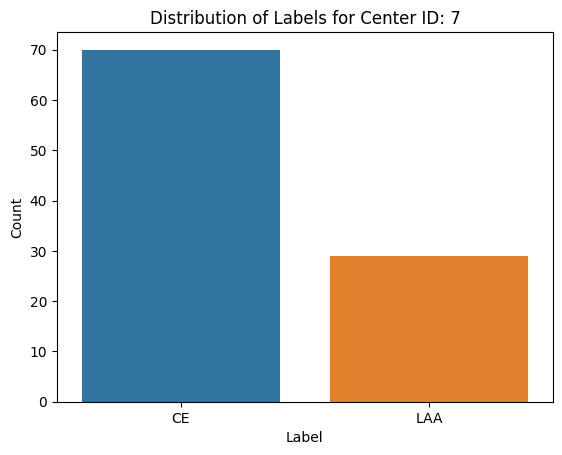

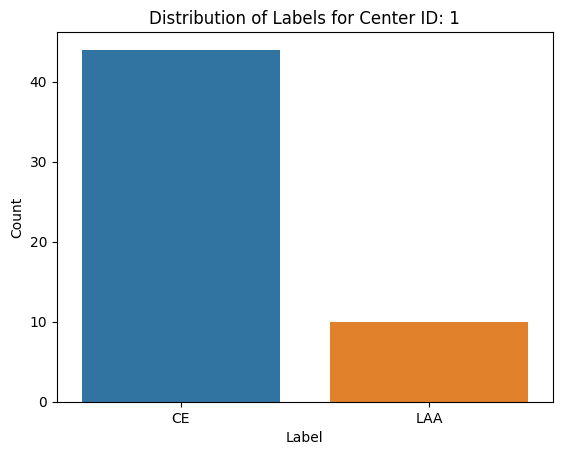

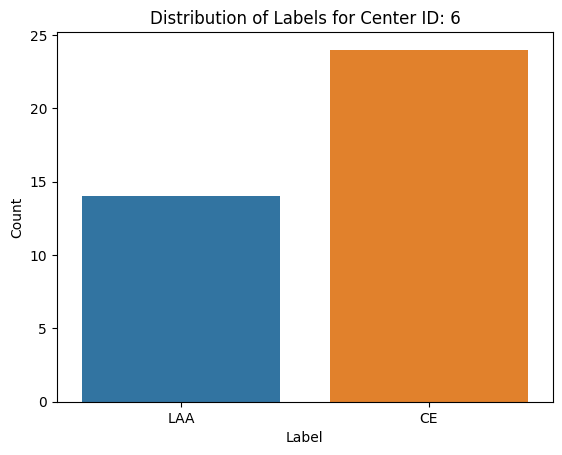

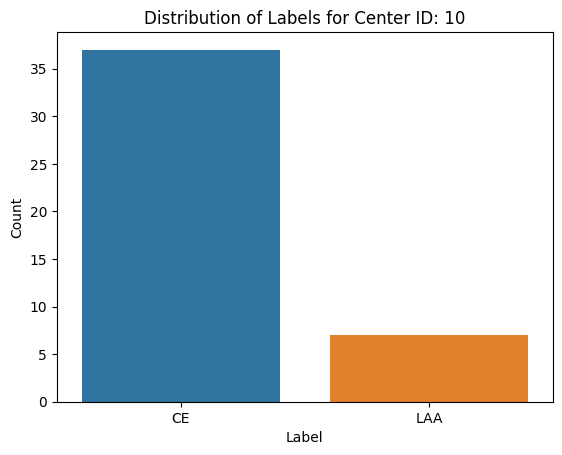

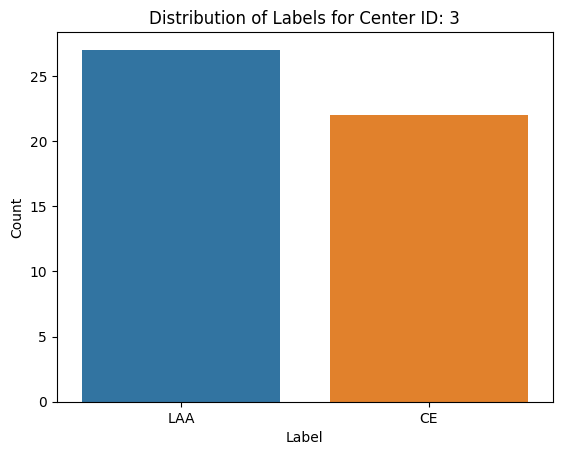

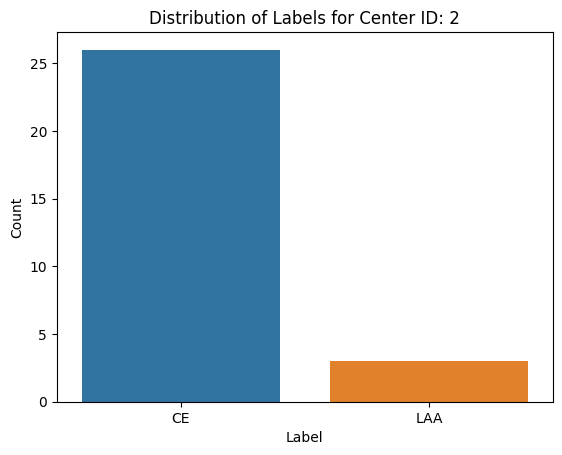

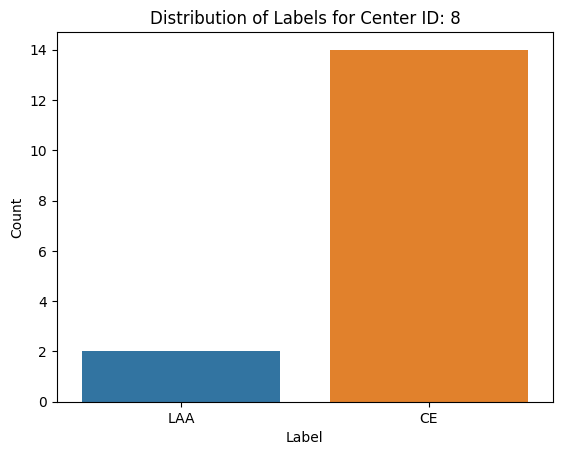

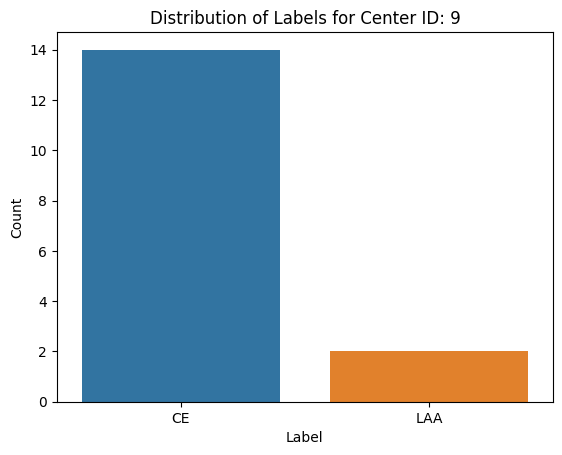

In [41]:
unique_centers = train_df['center_id'].unique()

for center in unique_centers:
    sns.countplot(x='label', data=train_df[train_df['center_id'] == center])
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'Distribution of Labels for Center ID: {center}')
    plt.show()

Como se puede observar el data set esta desbalanceado por lo que se tiene que buscar una estrategia para balancear el data set. En este caso podríamos balancear el data set de entrenamiento y luego dejar el data set de test desbalanceado. 

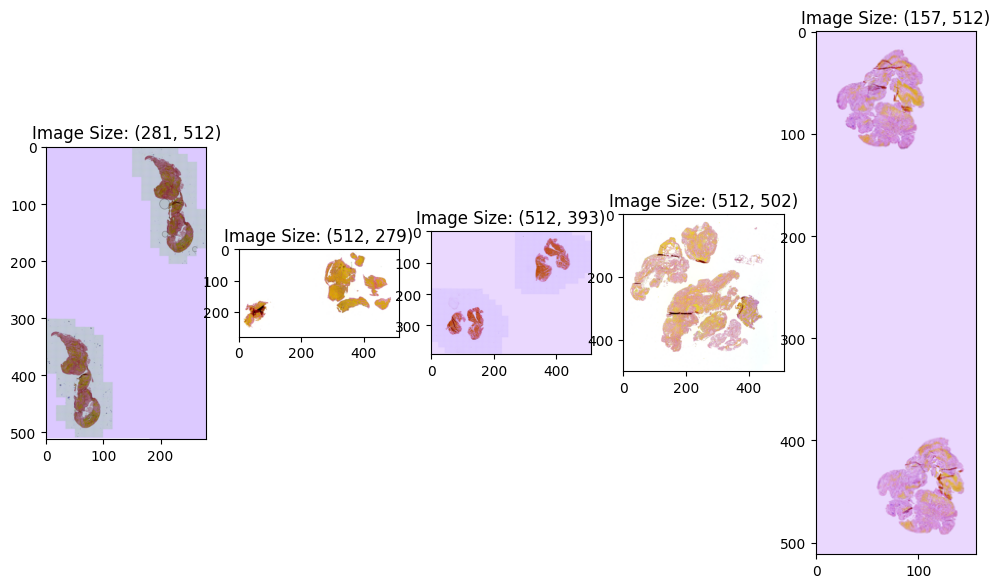

CPU times: user 1min 45s, sys: 12.2 s, total: 1min 57s
Wall time: 2min 5s


In [19]:
%%time
Image.MAX_IMAGE_PIXELS = None
size = (512,512)


sample_slides = train_df.sample(n=5, random_state=1) 
fig, axs = plt.subplots(1, 5, figsize = (12, 12))

for i in range(len(sample_slides.index)): 
    
    slide = Image.open(sample_slides.iloc[i]['image_path'])
    slide.thumbnail(size)
    axs[i].set_title(f'Image Size: {slide.size}')
    axs[i].imshow(slide)

plt.show()

In [76]:
other_df.head()

,image_id,patient_id,image_num,other_specified,label
0,01f2b3_0,01f2b3,0,NaN,Unknown
1,01f2b3_1,01f2b3,1,NaN,Unknown
2,02ebd5_0,02ebd5,0,NaN,Unknown
3,0412ab_0,0412ab,0,NaN,Unknown
4,04414e_0,04414e,0,Hypercoagulable,Other


In [77]:
other_df['image_path'] = other_df['image_id'].apply(lambda x: "../input/mayo-clinic-strip-ai/other/" + x + ".tif")
other_df.head()

,image_id,patient_id,image_num,other_specified,label,image_path
0,01f2b3_0,01f2b3,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/01f2b3_0.tif
1,01f2b3_1,01f2b3,1,NaN,Unknown,../input/mayo-clinic-strip-ai/other/01f2b3_1.tif
2,02ebd5_0,02ebd5,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/02ebd5_0.tif
3,0412ab_0,0412ab,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/0412ab_0.tif
4,04414e_0,04414e,0,Hypercoagulable,Other,../input/mayo-clinic-strip-ai/other/04414e_0.tif


In [78]:
other_df["target"] = other_df["label"].apply(lambda x : 1 if x=="Unknown" else 0)
other_df.head()

,image_id,patient_id,image_num,other_specified,label,image_path,target
0,01f2b3_0,01f2b3,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/01f2b3_0.tif,1
1,01f2b3_1,01f2b3,1,NaN,Unknown,../input/mayo-clinic-strip-ai/other/01f2b3_1.tif,1
2,02ebd5_0,02ebd5,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/02ebd5_0.tif,1
3,0412ab_0,0412ab,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/0412ab_0.tif,1
4,04414e_0,04414e,0,Hypercoagulable,Other,../input/mayo-clinic-strip-ai/other/04414e_0.tif,0


In [79]:
other_df.head()

,image_id,patient_id,image_num,other_specified,label,image_path,target
0,01f2b3_0,01f2b3,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/01f2b3_0.tif,1
1,01f2b3_1,01f2b3,1,NaN,Unknown,../input/mayo-clinic-strip-ai/other/01f2b3_1.tif,1
2,02ebd5_0,02ebd5,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/02ebd5_0.tif,1
3,0412ab_0,0412ab,0,NaN,Unknown,../input/mayo-clinic-strip-ai/other/0412ab_0.tif,1
4,04414e_0,04414e,0,Hypercoagulable,Other,../input/mayo-clinic-strip-ai/other/04414e_0.tif,0


In [ ]:

import numpy as np
from openslide import OpenSlide
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

from PIL import Image

def reduce_resolution(img, base_width=256):
    # Convertir la imagen a PIL si es necesario
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    
    # Calcular la proporción
    w_percent = base_width / float(img.size[0])
    h_size = int(float(img.size[1]) * float(w_percent))
    
    # Redimensionar
    img_resized = img.resize((base_width, h_size), Image.LANCZOS)
    
    return np.array(img_resized)



# Función para calcular la proporción de área blanca en una imagen
def preprocess(image_path):
    try:
        # Cargar la imagen con OpenSlide
        slide = OpenSlide(image_path)
        
        # Dimensiones de la imagen
        width, height = slide.dimensions
        
        # Dimensiones de la ventana
        window_width, window_height = 5500, 5500
        
        # Calcular las coordenadas de inicio para centrar la ventana
        start_x = (width - window_width) // 2
        start_y = (height - window_height) // 2
        
        # Leer la región centrada y redimensionarla
        image = slide.read_region((start_x, start_y), 0, (window_width, window_height))
        image = reduce_resolution(image)
        image = np.array(image)
        
        # Convertir la imagen a escala de grises
        imagen_gris = np.mean(image, axis=2)
        
        # Calcular el área blanca en la imagen
        area_blanca = np.sum(imagen_gris > 200)  # Consideramos como blanco los píxeles con intensidad mayor a 200
        
        # Calcular el área total de la imagen
        area_total = 256 * 256
        
        # Calcular la proporción de área blanca
        proporcion_area_blanca = area_blanca / area_total
        
        return proporcion_area_blanca, image  # También retornamos la imagen
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {str(e)}")
        return None, None


# Lista de rutas de imágenes a cargar y procesar
image_paths = other_df['image_path'].tolist()

# Número de procesos en paralelo
num_processes = 4  # Ajusta según la cantidad de CPU disponibles

# Umbral para filtrar imágenes (por ejemplo, 95% de área blanca)
umbral_area_blanca = 0.97

# Carga y procesamiento de imágenes en paralelo con tqdm
with Pool(num_processes) as pool, tqdm(total=len(image_paths)) as pbar:
    X_pre_train = []
    Y_pre_train = []  # Lista para almacenar las etiquetas correspondientes
    for i, image_path in enumerate(image_paths):
        proporcion_area_blanca, imagen = preprocess(image_path)
        if proporcion_area_blanca is not None and proporcion_area_blanca <= umbral_area_blanca:
            X_pre_train.append(imagen)  # Agregar la imagen en lugar del path
            Y_pre_train.append(other_df['target'].iloc[i])  # Agregar la etiqueta correspondiente
        pbar.update(1)  # Actualiza la barra de progreso

# Convierte las listas en arrays de NumPy
X_pre_train = np.array(X_pre_train)
Y_pre_train = np.array(Y_pre_train)


In [101]:
num_images = len(X_pre_train)
print(f"Total de imágenes en X_pre_train: {num_images}")

type(X_pre_train)
print(X_pre_train[1])

Total de imágenes en X_pre_train: 106
[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


In [102]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import GlobalMaxPooling2D
from keras.models import load_model
from tensorflow.keras.applications import VGG16

In [103]:
X_pre_train=X_pre_train[:, :, :, :3]
X_pre_train=X_pre_train/255.0
Y_pre_train = np.array(Y_pre_train)

In [104]:
## Splitting data
x_pre_train,x_pre_test,y_pre_train,y_pre_test=train_test_split(X_pre_train,Y_pre_train, test_size=0.2, random_state=42)

In [121]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import GlobalMaxPooling2D
from keras.models import load_model
from tensorflow.keras.applications import VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K 
from tensorflow.keras.optimizers import Adam

# Función F1 score
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Crear el modelo ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False

pre_model = Sequential()
pre_model.add(base_model)
pre_model.add(Flatten())
pre_model.add(Dense(128, activation='relu'))
pre_model.add(Dropout(0.5))
pre_model.add(Dense(1, activation='sigmoid'))
pre_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy', f1_score])
pre_model.summary()




# Crear generadores de imágenes para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()  # No aplicamos aumentos en el conjunto de validación


batch_size = 32

train_generator = train_datagen.flow(x_pre_train, y_pre_train, batch_size=batch_size)
validation_generator = validation_datagen.flow(x_pre_test, y_pre_test, batch_size=batch_size)


num_epochs = 5
steps_per_epoch = len(x_pre_train) // batch_size
validation_steps = len(x_pre_test) // batch_size

history = pre_model.fit(train_generator,
                        epochs=num_epochs,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=validation_generator)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 131072)            0         
                                                                 
 dense_18 (Dense)            (None, 128)               16777344  
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 40,365,185
Trainable params: 16,777,473
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/5
2/2 [==================

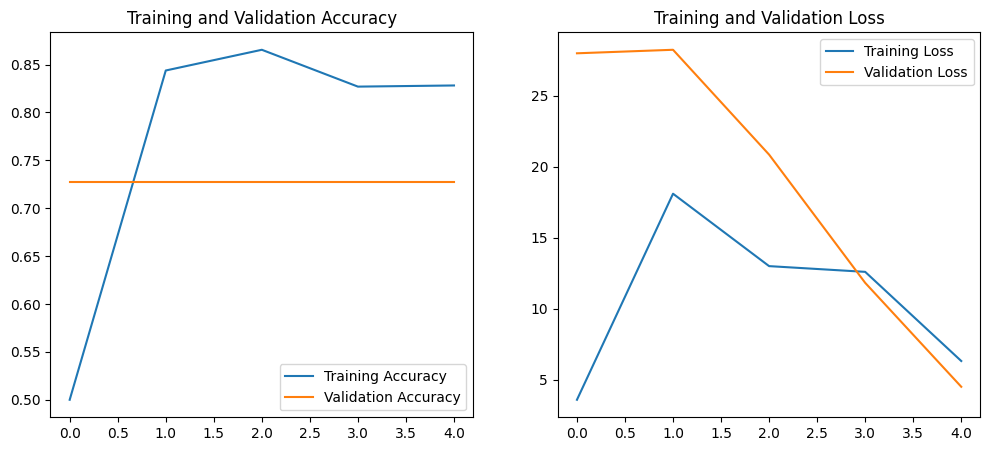

In [122]:
# Plotting training accuracy & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting training loss & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


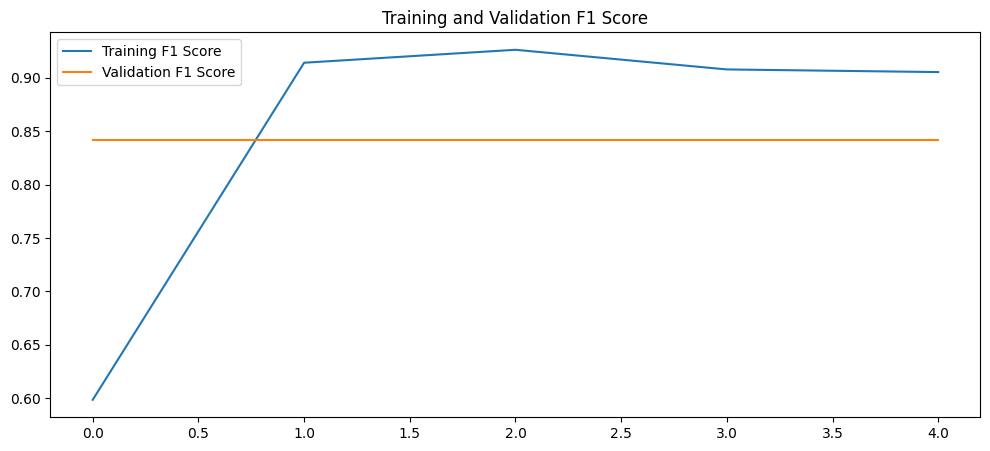

In [123]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.legend()
plt.title('Training and Validation F1 Score')

plt.show()



In [147]:
""""
import os
import glob

# Lista de todos los archivos .tif en el directorio
files = glob.glob("/kaggle/working/*.h5")

# Eliminar cada archivo
for file in files:
    os.remove(file)
    """
#No correr a menos que se quiera borrar un modelo

In [167]:
# Lista de todos los archivos .tif en el directorio
remaining_files = glob.glob("/kaggle/working/*.h5")

print(remaining_files)  # Si se eliminaron correctamente, esto debería imprimir una lista vacía.


['/kaggle/working/model.h5', '/kaggle/working/pre_model.h5']


In [148]:
model_path = "/kaggle/working/pre_model.h5"
pre_model.save(model_path)


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model(model_path, custom_objects={'f1_score': f1_score})


In [124]:
train_df.head()

,image_id,center_id,patient_id,image_num,label,image_path
0,006388_0,11,006388,0,CE,../input/mayo-clinic-strip-ai/train/006388_0.tif
1,008e5c_0,11,008e5c,0,CE,../input/mayo-clinic-strip-ai/train/008e5c_0.tif
2,00c058_0,11,00c058,0,LAA,../input/mayo-clinic-strip-ai/train/00c058_0.tif
3,01adc5_0,11,01adc5,0,LAA,../input/mayo-clinic-strip-ai/train/01adc5_0.tif
4,026c97_0,4,026c97,0,CE,../input/mayo-clinic-strip-ai/train/026c97_0.tif


In [130]:
train_df['image_path'] =train_df['image_id'].apply(lambda x: "../input/mayo-clinic-strip-ai/train/" + x + ".tif")
train_df.head()

,image_id,center_id,patient_id,image_num,label,image_path,target
0,006388_0,11,006388,0,CE,../input/mayo-clinic-strip-ai/train/006388_0.tif,1
1,008e5c_0,11,008e5c,0,CE,../input/mayo-clinic-strip-ai/train/008e5c_0.tif,1
2,00c058_0,11,00c058,0,LAA,../input/mayo-clinic-strip-ai/train/00c058_0.tif,0
3,01adc5_0,11,01adc5,0,LAA,../input/mayo-clinic-strip-ai/train/01adc5_0.tif,0
4,026c97_0,4,026c97,0,CE,../input/mayo-clinic-strip-ai/train/026c97_0.tif,1


In [131]:
train_df["target"] = train_df["label"].apply(lambda x : 1 if x=="CE" else 0)
train_df.head()

,image_id,center_id,patient_id,image_num,label,image_path,target
0,006388_0,11,006388,0,CE,../input/mayo-clinic-strip-ai/train/006388_0.tif,1
1,008e5c_0,11,008e5c,0,CE,../input/mayo-clinic-strip-ai/train/008e5c_0.tif,1
2,00c058_0,11,00c058,0,LAA,../input/mayo-clinic-strip-ai/train/00c058_0.tif,0
3,01adc5_0,11,01adc5,0,LAA,../input/mayo-clinic-strip-ai/train/01adc5_0.tif,0
4,026c97_0,4,026c97,0,CE,../input/mayo-clinic-strip-ai/train/026c97_0.tif,1


In [150]:
#Es diferente para el modelo real
import numpy as np
from openslide import OpenSlide
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

from PIL import Image

def reduce_resolution(img, base_width=256):
    # Convertir la imagen a PIL si es necesario
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    
    # Calcular la proporción
    w_percent = base_width / float(img.size[0])
    h_size = int(float(img.size[1]) * float(w_percent))
    
    # Redimensionar
    img_resized = img.resize((base_width, h_size), Image.LANCZOS)
    
    return np.array(img_resized)



# Función para calcular la proporción de área blanca en una imagen
def preprocess(image_path):
    try:
        # Cargar la imagen con OpenSlide
        slide = OpenSlide(image_path)
        
        # Dimensiones de la imagen
        width, height = slide.dimensions
        
        # Dimensiones de la ventana
        window_width, window_height = 7500, 7500
        
        # Calcular las coordenadas de inicio para centrar la ventana
        start_x = (width - window_width) // 2
        start_y = (height - window_height) // 2
        
        # Leer la región centrada y redimensionarla
        image = slide.read_region((start_x, start_y), 0, (window_width, window_height))
        image = reduce_resolution(image)
        image = np.array(image)
        
        # Convertir la imagen a escala de grises
        imagen_gris = np.mean(image, axis=2)
        
        # Calcular el área blanca en la imagen
        area_blanca = np.sum(imagen_gris > 200)  # Consideramos como blanco los píxeles con intensidad mayor a 200
        
        # Calcular el área total de la imagen
        area_total = 256 * 256
        
        # Calcular la proporción de área blanca
        proporcion_area_blanca = area_blanca / area_total
        
        return proporcion_area_blanca, image  # También retornamos la imagen
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {str(e)}")
        return None, None


# Lista de rutas de imágenes a cargar y procesar
image_paths = train_df['image_path'].tolist()

# Número de procesos en paralelo
num_processes = 4  # Ajusta según la cantidad de CPU disponibles

# Umbral para filtrar imágenes (por ejemplo, 95% de área blanca)
umbral_area_blanca = 0.97

# Carga y procesamiento de imágenes en paralelo con tqdm
with Pool(num_processes) as pool, tqdm(total=len(image_paths)) as pbar:
    X_train = []
    Y_train = []  # Lista para almacenar las etiquetas correspondientes
    for i, image_path in enumerate(image_paths):
        proporcion_area_blanca, imagen = preprocess(image_path)
        if proporcion_area_blanca is not None and proporcion_area_blanca <= umbral_area_blanca:
            X_train.append(imagen)  # Agregar la imagen en lugar del path
            Y_train.append(train_df['target'].iloc[i])  # Agregar la etiqueta correspondiente
        pbar.update(1)  # Actualiza la barra de progreso

# Convierte las listas en arrays de NumPy
X_train = np.array(X_train)
Y_train = np.array(Y_train)


100%|██████████| 754/754 [1:43:37<00:00,  8.25s/it]


In [151]:
num_images = len(X_train)
print(f"Total de imágenes en X_pre_train: {num_images}")

Total de imágenes en X_pre_train: 246


In [163]:
Y_train

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1])

In [152]:
X_train=X_train[:, :, :, :3]
X_train=X_train/255.0
Y_train = np.array(Y_train)

In [153]:
## Splitting data
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

In [154]:
## This is where we balance class weights
from sklearn.utils import compute_class_weight
train_classes = Y_train
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_classes),
                                        y = train_classes                                                    
                                    )
class_weights = dict(zip(np.unique(train_classes), class_weights))
class_weights

{0: 1.7571428571428571, 1: 0.6988636363636364}

In [164]:
train_datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()  # No aplicamos aumentos en el conjunto de validación

batch_size = 32
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
validation_generator = validation_datagen.flow(x_test, y_test, batch_size=batch_size)

In [160]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input

pre_model = load_model('/kaggle/working/pre_model.h5', custom_objects={'f1_score': f1_score})

# Inicializar la entrada
input_tensor = Input(shape=(256, 256, 3))

# Usar la arquitectura ResNet50 preentrenada, pero sin incluir las capas superiores
base_model_resnet = ResNet50(weights=None, include_top=False, input_tensor=input_tensor)


# Crear un modelo secuencial llamado 'modelo'
modelo = Sequential()

# Agregar el modelo base de ResNet50
modelo.add(base_model_resnet)

# Agregar algunas capas personalizadas
modelo.add(Flatten())
modelo.add(Dense(256, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida binaria

# Ahora, transferir los pesos de pre_model al modelo
for layer in modelo.layers:
    if layer.name in [l.name for l in pre_model.layers]:
        layer.set_weights(pre_model.get_layer(name=layer.name).get_weights())

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

# Mostrar el resumen del modelo
modelo.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_12 (Flatten)        (None, 131072)            0         
                                                                 
 dense_25 (Dense)            (None, 256)               33554688  
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)               

In [165]:
num_epochs = 10
steps_per_epoch = len(x_train) // batch_size
validation_steps = len(x_test) // batch_size

history = modelo.fit(train_generator,
                     epochs=num_epochs,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=validation_generator,
                     validation_steps=validation_steps,
                     class_weight=class_weights)

Epoch 1/10
6/6 [==============================] - 117s 15s/step - loss: 25.6387 - accuracy: 0.6159 - f1_score: 0.6699 - val_loss: 49.8368 - val_accuracy: 0.2188 - val_f1_score: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 89s 17s/step - loss: 5.4665 - accuracy: 0.4390 - f1_score: 0.5248 - val_loss: 9.2255 - val_accuracy: 0.7188 - val_f1_score: 0.8364
Epoch 3/10
6/6 [==============================] - 101s 17s/step - loss: 3.1887 - accuracy: 0.5312 - f1_score: 0.5823 - val_loss: 2.8154 - val_accuracy: 0.5625 - val_f1_score: 0.7200
Epoch 4/10
6/6 [==============================] - 101s 17s/step - loss: 1.2667 - accuracy: 0.4948 - f1_score: 0.6042 - val_loss: 513.9882 - val_accuracy: 0.7188 - val_f1_score: 0.8364
Epoch 5/10
6/6 [==============================] - 89s 14s/step - loss: 1.6086 - accuracy: 0.5488 - f1_score: 0.6641 - val_loss: 150.3212 - val_accuracy: 0.7188 - val_f1_score: 0.8364
Epoch 6/10
6/6 [==============================] - 91s 15s/step - loss: 6.3194 - ac

In [166]:
model_path = "/kaggle/working/model.h5"
modelo.save(model_path)



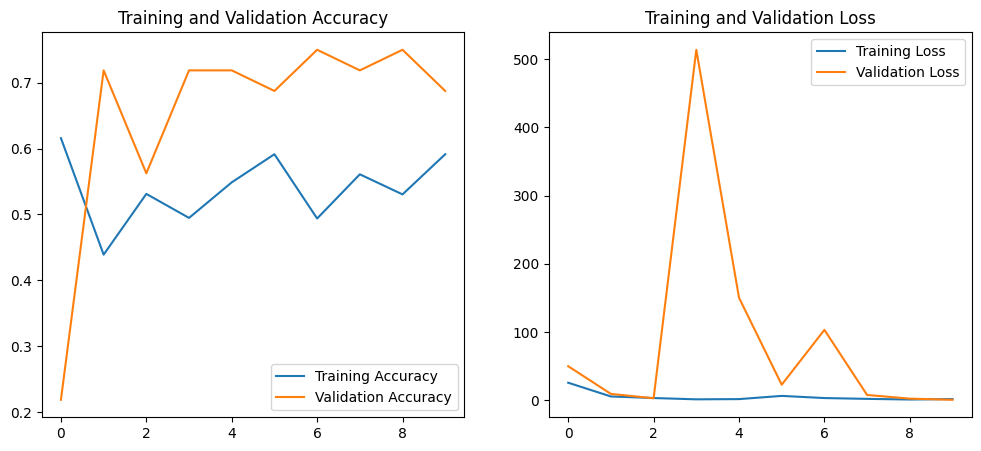

In [168]:
# Plotting training accuracy & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting training loss & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

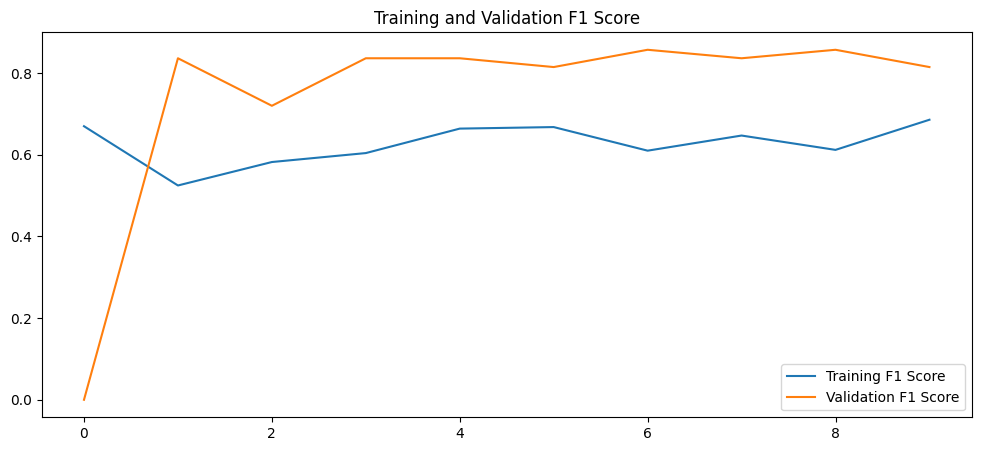

In [169]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.legend()
plt.title('Training and Validation F1 Score')

plt.show()


In [170]:
test_df['image_path'] =test_df['image_id'].apply(lambda x: "../input/mayo-clinic-strip-ai/test/" + x + ".tif")
test_df.head()

,image_id,center_id,patient_id,image_num,image_path
0,006388_0,11,006388,0,../input/mayo-clinic-strip-ai/test/006388_0.tif
1,008e5c_0,11,008e5c,0,../input/mayo-clinic-strip-ai/test/008e5c_0.tif
2,00c058_0,11,00c058,0,../input/mayo-clinic-strip-ai/test/00c058_0.tif
3,01adc5_0,11,01adc5,0,../input/mayo-clinic-strip-ai/test/01adc5_0.tif


In [175]:
# 1. Preprocesar las imágenes de prueba

# Supongamos que test_df es tu DataFrame con las rutas de las imágenes de prueba
image_paths_test = test_df['image_path'].tolist()

X_test = []
with tqdm(total=len(image_paths_test)) as pbar:
    for image_path in image_paths_test:
        _, imagen = preprocess(image_path)
        if imagen is not None:  # Añadir solo si la imagen fue preprocesada correctamente
            X_test.append(imagen)
        pbar.update(1)

X_test = np.array(X_test)
X_test=X_test[:, :, :, :3]
# 2. Cargar el modelo
modelo = load_model("/kaggle/working/model.h5", custom_objects={'f1_score': f1_score})

# 3. Hacer predicciones
predicciones = modelo.predict(X_test)
predicciones_clases = (predicciones > 0.5).astype(int).reshape(-1)

print(predicciones)
print(predicciones_clases)



100%|██████████| 4/4 [00:22<00:00,  5.52s/it]


1/1 [==============================] - 2s 2s/step
[[1.5620896e-01]
 [8.4895613e-03]
 [1.0709054e-05]
 [8.4223335e-05]]
[0 0 0 0]


In [176]:
# Suponiendo que los pasos previos ya se han completado y las predicciones están disponibles

# Recorrer las predicciones y los image_ids
for img_id, prob, pred_class in zip(test_df['image_id'], predicciones, predicciones_clases):
    print(f"Image ID: {img_id}, Probability: {prob[0]:.4f}, Predicted Class: {pred_class}")

Image ID: 006388_0, Probability: 0.1562, Predicted Class: 0
Image ID: 008e5c_0, Probability: 0.0085, Predicted Class: 0
Image ID: 00c058_0, Probability: 0.0000, Predicted Class: 0
Image ID: 01adc5_0, Probability: 0.0001, Predicted Class: 0
